In [1]:
import geopandas as gpd
from matplotlib import pyplot
import numpy
import earthpy as et
import rasterio as rio
from rasterio.plot import show

In [2]:
path='/data/raw_data/s2_aws/tiles/'

In [3]:
path_31TGJ=path+'31/T/GJ/'

In [4]:
path_exp=path_31TGJ+'2017/6/19/0/B8A_sur.tif'

In [5]:
path_groundtruth='/data/raw_data/wildfires-ground-truth/france/vars/'

In [6]:
open_file=gpd.read_file(path_groundtruth+'N_DFCI_CONTOUR_FEUX_2017_S_083.shp')

In [7]:
open_file

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,1.572297e+05,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
1,5135,19h35,LA CROIX-VALMER,2017-07-24,GIGARO,0.000000e+00,506 ha,IMAGE SATELLITE SENTINEL,RCCI_JETS OBJETS INCANDESCENTS,Synthèse IMAGE SENTINEL 2 et relevés GPS,"MULTIPOLYGON (((996138.181 6237162.083, 996167..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1.158500e+06,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
3,4669,23h00,LA LONDE-LES-MAURES,2017-07-25,VAL ROSE,1.423050e+07,"1423,05 ha",IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE_SUPPOSEE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((967149.726 6232341.320, 967169..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000000e+00,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000000e+00,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."
6,5133,22h12,ARTIGUES,2017-07-24,COLLE PELADE,1.780380e+07,1704 ha,IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((934652.103 6275662.078, 934646..."
7,6496,16h28,FREJUS,2017-09-01,A8 CAPITOU,3.470000e+05,"34,7 ha",GPS,RCCI_JETS OBJETS INCANDESCENTS,None,"MULTIPOLYGON (((1004320.901 6272550.143, 10042..."
8,6782,22h00,HYERES,2017-09-02,CHEMIN DES MAURES,4.318000e+06,431 ha,RELEVE TERRAIN,RCCI_MALVEILLANCE,None,"MULTIPOLYGON (((959136.098 6233651.015, 959161..."
9,0,None,COMPS/ARTUBY,2017-10-08,LA VERRERIE,2.381340e+02,"238,13 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((980684.678 6292938.727, 980684..."


In [8]:
open_file.total_bounds

array([ 925599.38517399, 6226802.40878843, 1004370.88129336,
       6296273.15835397])

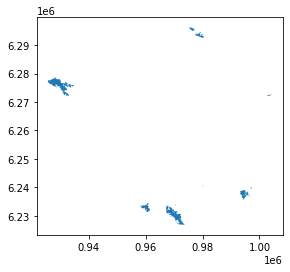

In [9]:
open_file.plot()

Plotting the shape file polygon with colour map and a legend on the ignition data

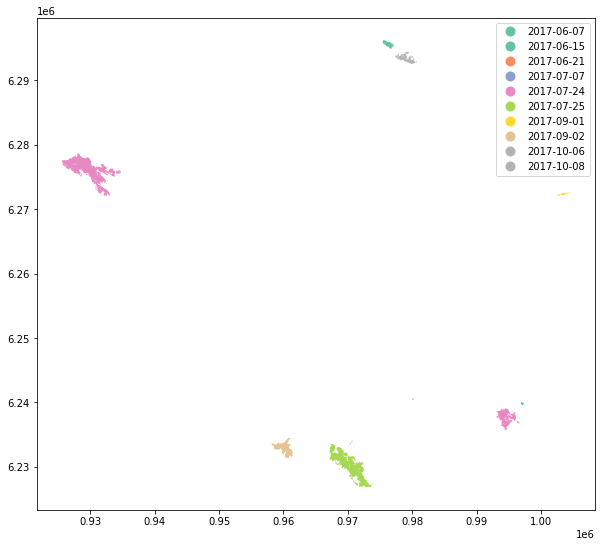

In [10]:
open_file.plot(column='DATE_ECLOS', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,10),
                         markersize=45, 
                         cmap="Set2")

Need rasterio and earthpy packages to open up GeoTIFF file:

In [11]:
open_s2_file=rio.open(path_exp)

In [12]:
open_s2_file.bounds

BoundingBox(left=699960.0, bottom=4790220.0, right=809760.0, top=4900020.0)

Open the metadata:

In [13]:
open_s2_file.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -9999.0,
 'width': 5490,
 'height': 5490,
 'count': 1,
 'crs': CRS.from_epsg(32631),
 'transform': Affine(20.0, 0.0, 699960.0,
        0.0, -20.0, 4900020.0)}

Show the resolution:

In [14]:
open_s2_file.res

(20.0, 20.0)

Check the EPSG code

In [15]:
et.epsg['32631']

'+proj=utm +zone=31 +datum=WGS84 +units=m +no_defs'

In [16]:
 print(open_s2_file.tags(ns='IMAGE_STRUCTURE'))

{'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND'}


In [17]:
open_s2_file.dataset_mask()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

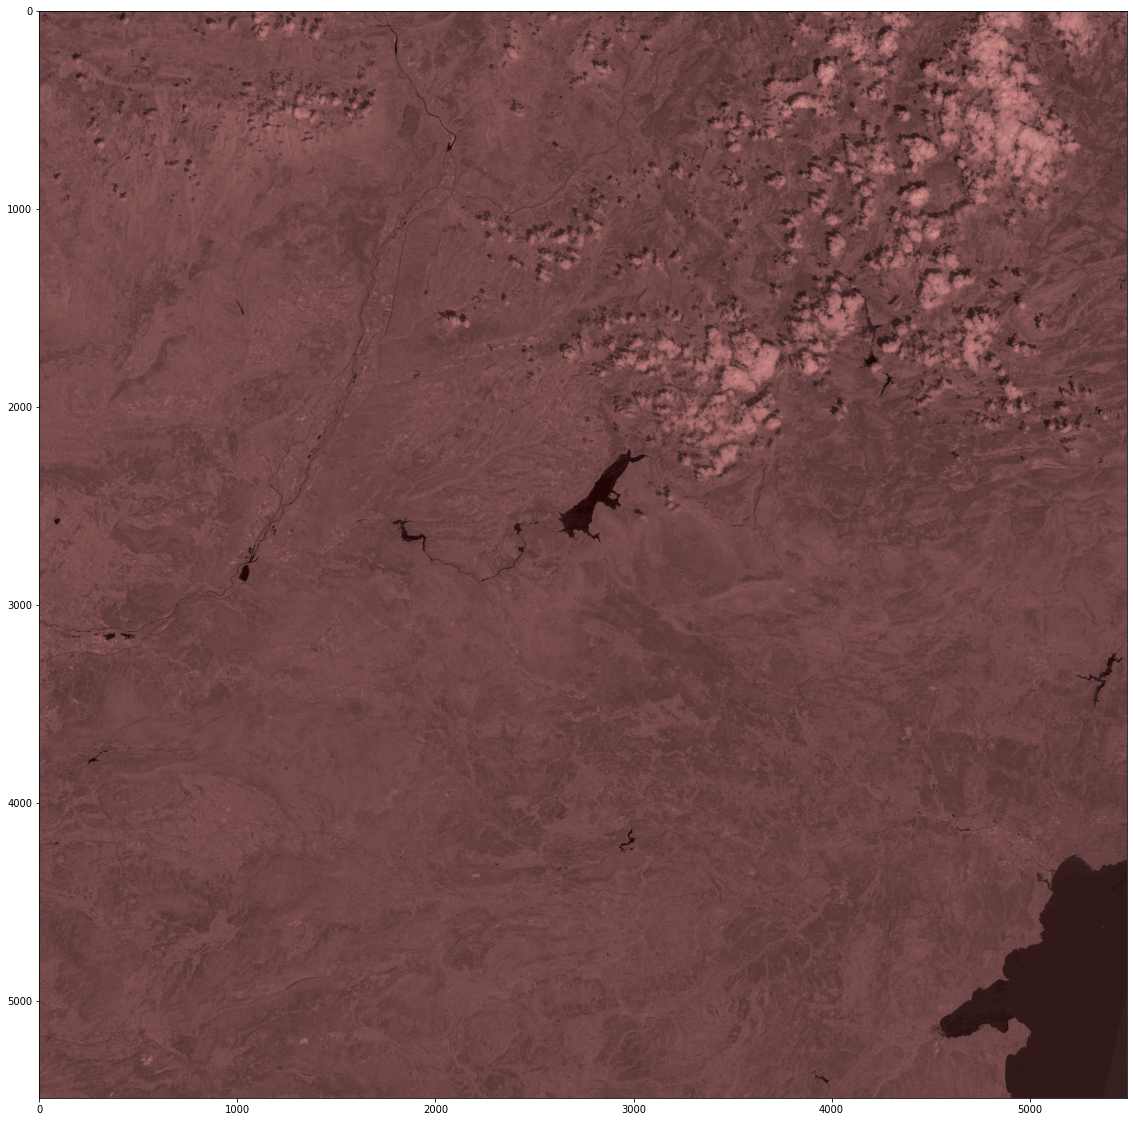

In [21]:
pyplot.figure(figsize=(20,20))
pyplot.imshow(open_s2_file.read(1), cmap='pink')

In [29]:
path_2=path_31TGJ+'2017/6/19/0/B11_sur.tif'

In [30]:
open_s2_file2=rio.open(path_2)

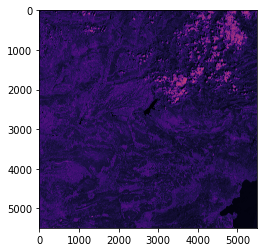

In [43]:
pyplot.imshow(open_s2_file2.read(1), cmap='magma')

In [23]:
open_file3=gpd.read_file("/home/robert/ds-field-boundaries/data/shapefile/french_farms_full_cliped.shp")

In [24]:
open_file3

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,144740,3.43,PPH,18,None,None,"POLYGON ((736183.747 6891956.548, 736145.978 6..."
1,144733,0.39,BTH,1,None,None,"POLYGON ((735741.192 6893077.915, 735869.153 6..."
2,144735,1.41,BTH,1,None,None,"POLYGON ((735777.689 6893142.648, 735771.388 6..."
3,177363,0.03,SNE,28,None,None,"POLYGON ((735724.493 6893107.600, 735724.157 6..."
4,144734,0.40,PPH,18,None,None,"POLYGON ((734706.892 6894211.313, 734634.626 6..."
...,...,...,...,...,...,...,...
130273,11383914,7.70,BTH,1,None,None,"POLYGON ((791064.868 6856818.263, 791117.512 6..."
130274,9321674,6.32,CZH,5,None,None,"POLYGON ((733719.820 6866197.935, 733604.991 6..."
130275,9321749,0.97,SNE,28,None,None,"POLYGON ((733785.844 6866345.227, 733767.050 6..."
130276,9321752,0.54,SNE,28,None,None,"POLYGON ((734194.878 6866069.793, 734070.160 6..."
